In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from sklearn.preprocessing import normalize

In [18]:
iris_dataset = load_iris()
iris_dataset
X, y = load_iris(return_X_y=True)

# Scale input vectors individually to unit norm (vector length).
# axis=1 - по примерам
# axis=0 - по признакам
X = normalize(X, axis=0)
# print(X.shape, y.shape)

In [21]:
test_size1 = 0.4
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=test_size1, random_state=24)
print(X_tr.shape, X_t.shape)
# X_tr = normalize(X_tr, axis=1)

(90, 4) (60, 4)


In [13]:
# test_size1 = 0.4
# X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=test_size1, random_state=24)
# print(X_tr.shape, X_t.shape)
# X_tr = normalize(X_tr, axis=0)

# test_size2 = 0.5
# X_t1, X_t2, y_t1, y_t2 = train_test_split(X_t, y_t, test_size=test_size2, random_state=24)
# print(X_t1.shape, X_t2.shape)
# X_t2 = normalize(X_t2, axis=0)

(90, 4) (60, 4)


In [12]:
test_size1 = 0.2
X_tr, X_t1, y_tr, y_t1 = train_test_split(X, y, test_size=test_size1, random_state=24)
print(X_tr.shape, X_t1.shape)
X_tr = normalize(X_tr, axis=1)

(120, 4) (30, 4)


In [13]:
test_size2 = 0.10
X_tr, X_t2, y_tr, y_t2 = train_test_split(X_tr, y_tr, test_size=test_size2, random_state=24)
print(X_t1.shape, X_t2.shape)
# X_t2 = normalize(X_t2, axis=0)

(30, 4) (12, 4)


In [19]:

def Triangle(r):
    return (np.abs(r) <= 1)*(1 - np.abs(r))
def Rectangle(r):
    return (np.abs(r) <= 1) * 0.5

def _K(r, a = 1) :
    return (1/(r + a))


class PotentialFunctionsMethod:
    def __init__(self, h = 1, Kernel = _K):
        self._h = h
        self._kernel = Kernel
        
    def Alpha(self, x):
        diff = self._X_train - x
#         print(diff)
        sq_diff = diff ** 2
        dist_sq = sq_diff.sum(axis=-1)
        dist = dist_sq ** 0.5
#         print(dist)
        dist = dist/self._h
        weight = self._gamma * self._kernel(dist / self._h)
        s = (self._classes[:, np.newaxis] == self._y_train[np.newaxis, :])
        ls = s[::] * weight
        ss = ls.sum(axis = -1)
        max_ind = ss.argmax()
        return self._classes[max_ind]
        
    def fit(self, X_train, y_train):
        self._classes = np.unique(y_train)
        self._X_train = X_train
        self._y_train = y_train
        curr_predicted = np.zeros(y_train.shape[0])
        self._gamma = np.zeros(len(y_train))
#         print(self._X_train)
        coun=0 
        while accuracy_score(y_train,curr_predicted) <= 0.98:
            coun+=1
            for i in range(len(y_train)):
                curr_predicted[i] = self.Alpha(X_train[i])
                if (curr_predicted[i] != self._y_train[i]):
                    self._gamma[i] += 1
#         print(self._gamma)
        ind = np.where((self._gamma <1))
#         print(ind)
        self._X_train = np.delete(self._X_train, ind, axis = 0)
        self._gamma = np.delete(self._gamma, ind)
        self._y_train = np.delete(self._y_train, ind, axis = 0)
#         print(self._X_train)                
        print(coun)
                        
#         for i in range(35):
#             for xi in self._X_train:
#                 if (self.Alpha(xi) != self._y_train[i]):
#                     self._gamma[i] += 1
            
#         for i in range(self._y_train.shape[0]):
#             print (self._y_train[int3Dddar(i)], self._gamma[int(i)])  
        return self
    def predict(self, X_test):
        res = []
        for x in X_test:
            res.append(self.Alpha(x))
        return res
    
    def draw_train(self): 
    
        fig = plt.figure(1, figsize=(8, 6))
        ax = Axes3D(fig, elev=-150, azim=110)
        # X_reduced = PCA(n_components=3).fit_transform(iris_dataset.data)
        X_reduced = PCA(n_components=3).fit_transform(self._X_train)
        markers=['c' if i<3 else 'X'for i in self._y_train]
        print(self._gamma)
        ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=self._y_train, s=self._gamma*30 + 60,
                   cmap=plt.cm.Set1, edgecolor='k')
        # ax.legend()
        ax.set_title("First three PCA directions")
        ax.set_xlabel("1st eigenvector")
        ax.w_xaxis.set_ticklabels([])
        ax.set_ylabel("2nd eigenvector")
        ax.w_yaxis.set_ticklabels([])
        ax.set_zlabel("3rd eigenvector")
        ax.w_zaxis.set_ticklabels([])
        

In [15]:
ker = Triangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
X_t1 = normalize(X_t1, axis=1)
predicted = potentialM.predict(X_t1)
print("accuracy normalized = ", accuracy_score(y_t1, predicted))
print("accuracy = ", accuracy_score(y_t1, predicted, normalize=False))

12
accuracy normalized =  0.9666666666666667
accuracy =  29


In [16]:
ker = Triangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t2)
print("accuracy normalized = ", accuracy_score(y_t2, predicted))
print("accuracy = ", accuracy_score(y_t2, predicted, normalize=False))

12
accuracy normalized =  0.9166666666666666
accuracy =  11


[1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 3. 3.]


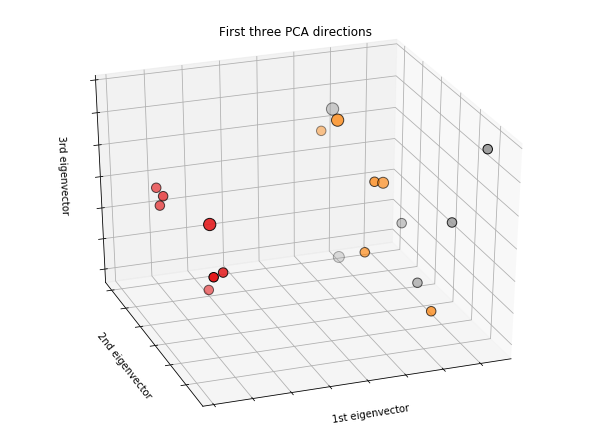

In [6]:
potentialM.draw_train()

In [80]:
# if del gamma=0

# while cells

In [50]:
%matplotlib
ker = Triangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

# by examples

Using matplotlib backend: Qt5Agg
22
accuracy normalized =  0.9666666666666667
accuracy =  58


In [22]:
%matplotlib
ker = Triangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

# by features

Using matplotlib backend: Qt5Agg
4
accuracy normalized =  0.9666666666666667
accuracy =  58


In [23]:
potentialM.draw_train()

[1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 3. 3.]


In [81]:
ker = Rectangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

KeyboardInterrupt: 

In [27]:
potentialM = PotentialFunctionsMethod(1)
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

2
accuracy normalized =  0.9833333333333333
accuracy =  59


In [28]:
potentialM.draw_train()

[1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# for cells

In [86]:
ker = Triangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

accuracy normalized =  0.9833333333333333
accuracy =  59


[58. 54. 37. 72. 59. 50. 57. 70. 54. 54. 70. 55. 56. 56. 56. 68. 67. 57.
 55. 64. 62. 59. 62. 59. 59. 59. 59. 59. 58. 59. 58. 58. 59. 56. 66.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


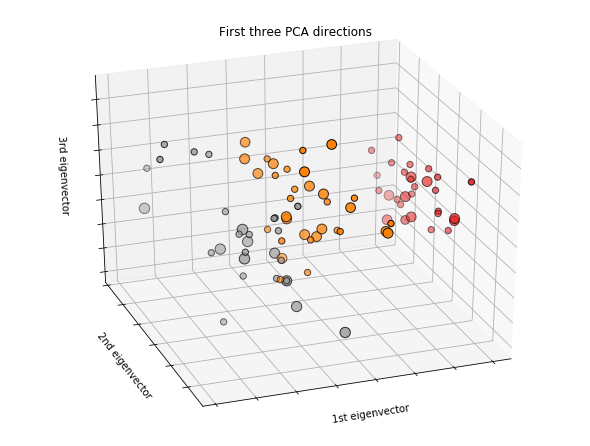

In [87]:
potentialM.draw_train()

In [92]:
ker = Rectangle
potentialM = PotentialFunctionsMethod(1, Kernel = ker )
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

accuracy normalized =  0.95
accuracy =  57


[58. 54. 37. 75. 59. 50. 54. 73. 51. 51. 72. 53. 56. 56. 56. 70. 67. 57.
 54. 66. 64. 59. 62. 62. 59. 62. 60. 59. 56. 59. 56. 53. 59. 53. 68.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


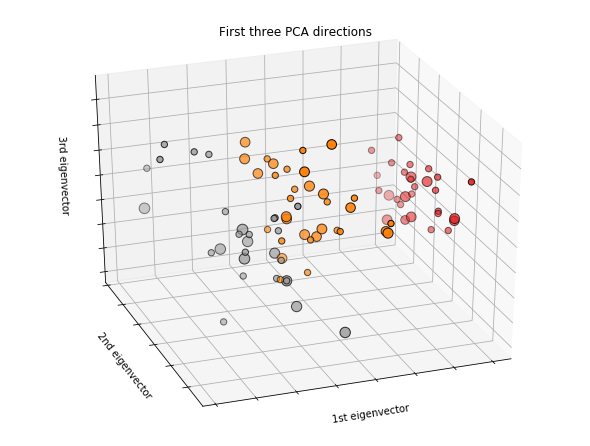

In [93]:
potentialM.draw_train()

In [89]:
potentialM = PotentialFunctionsMethod(1)
potentialM.fit(X_tr, y_tr)
predicted = potentialM.predict(X_t)
print("accuracy normalized = ", accuracy_score(y_t, predicted))
print("accuracy = ", accuracy_score(y_t, predicted, normalize=False))

accuracy normalized =  0.8333333333333334
accuracy =  50


[ 1.  0.  3. 12. 16. 48. 37. 76. 42. 26. 69. 35. 66. 61. 61. 59. 45. 70.
 55. 64. 55. 61. 43. 72. 61. 65. 59. 51. 48. 61. 43. 37. 61. 33. 83.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


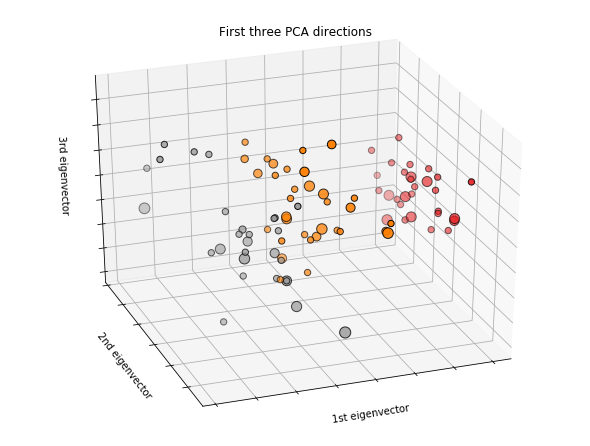

In [90]:
potentialM.draw_train()

[]

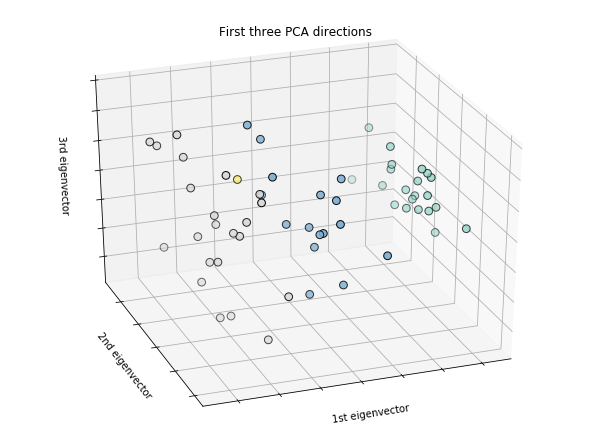

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

ind = np.argwhere(y_t != predicted)
new_y = predicted.copy()
for i in ind:
    new_y[int(i)] = 3

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(iris_dataset.data)
X_reduced = PCA(n_components=3).fit_transform(X_t)
markers=['c' if i<3 else 'X'for i in new_y]
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=new_y,
           cmap=plt.cm.Set3, edgecolor='k', s=60)
# ax.legend()
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [ ]:
#  for i in range(35):
#             i = 0
#             for xi in self._X_train:
#                 curr_predicted[i] = self.Alpha(xi)
#                 if (curr_predicted[i] != self._y_train[i]):
# #                 if (self.Alpha(xi) != self._y_train[i]):
#                     self._gamma[i] += 1
#                 i+=1
            
#         for i in range(self._y_train.shape[0]):
#             print (self._y_train[int(i)], self._gamma[int(i)])

Automatically created module for IPython interactive environment
(60, 2)
(60, 2)
(60, 2)


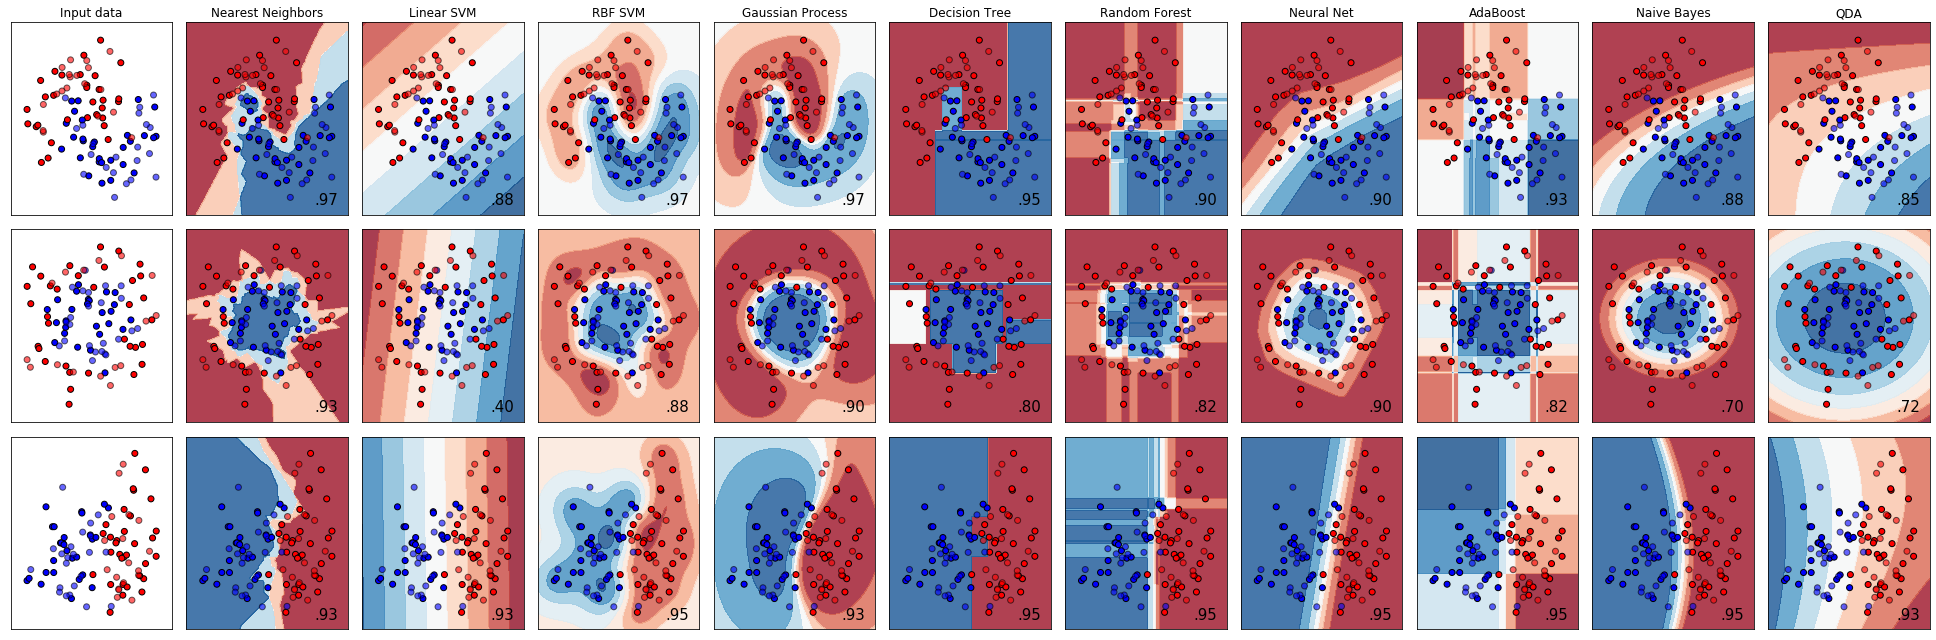

In [3]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
Z
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    print(X_train.shape)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()